<a href="https://colab.research.google.com/github/Mustafa-Mehdi/Automating-linearization/blob/master/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading Dataset

In [ ]:
dataset  = pd.read_csv('/content/drive/MyDrive/Loan_default.csv')

In [ ]:
dataset.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [ ]:
dataset.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [ ]:
dataset

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


# Feature Engineering
### Dropping Load Id

In [ ]:
dataset.drop('LoanID',axis=1,inplace=True)

In [ ]:
dataset.reset_index(drop=True,inplace=True)

In [ ]:
dataset

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


# Exploratory Data Analysis

In [ ]:
def plot_pie(dataset,column,labels,title):
  dataset[column].value_counts().plot(kind='pie',ylabel='',labels=labels,autopct='%1.2f%%',subplots=True,title=title)

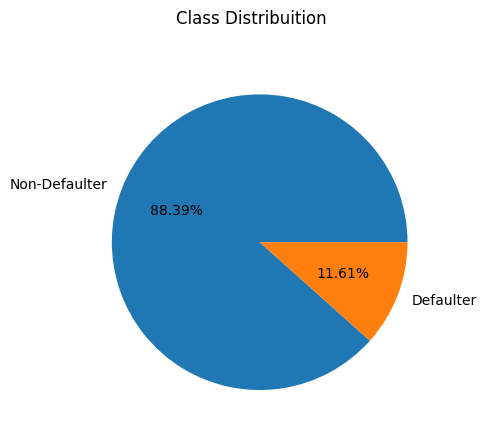

In [ ]:
plot_pie(dataset,'Default',['Non-Defaulter','Defaulter'],'Class Distribuition')

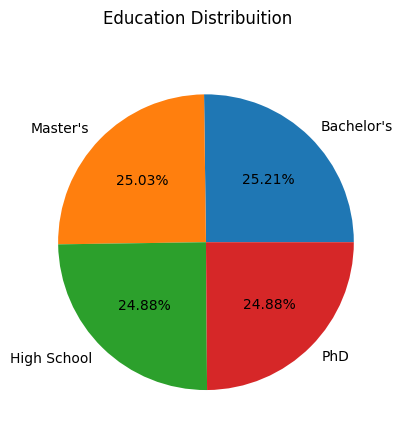

In [ ]:
plot_pie(dataset,'Education',dataset['Education'].unique(),'Education Distribuition')

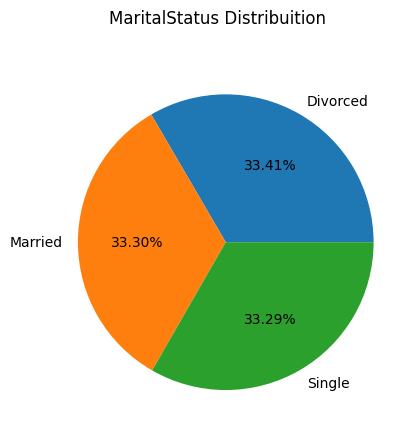

In [ ]:
plot_pie(dataset,'MaritalStatus',dataset['MaritalStatus'].unique(),'MaritalStatus Distribuition')

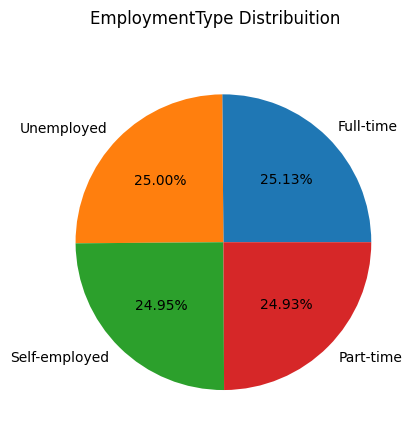

In [ ]:
plot_pie(dataset,'EmploymentType',dataset['EmploymentType'].unique(),'EmploymentType Distribuition')

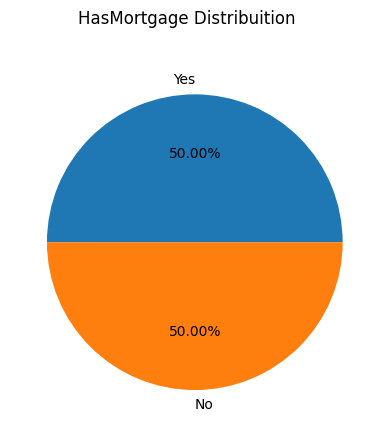

In [ ]:
plot_pie(dataset,'HasMortgage',dataset['HasMortgage'].unique(),f'HasMortgage Distribuition')

In [ ]:
defaulters = dataset[dataset['Default']==1]

In [ ]:
underagedDivorceddef = defaulters[(defaulters['Age']<25)&(defaulters['MaritalStatus']=='Divorced')]

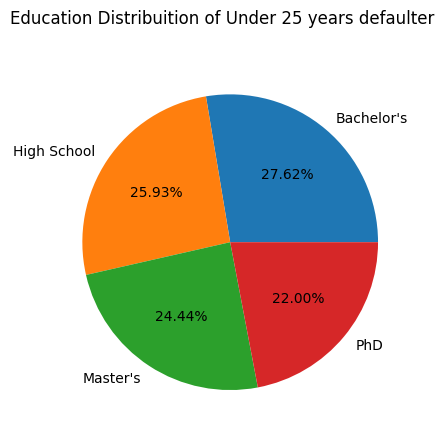

In [ ]:
plot_pie(underagedDivorceddef,'Education',underagedDivorceddef['Education'].unique(),'Education Distribuition of Under 25 years defaulter')

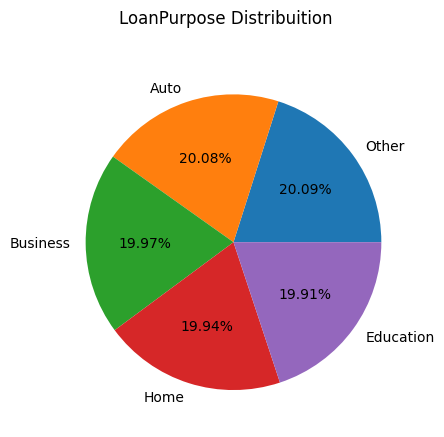

In [ ]:
plot_pie(dataset,'LoanPurpose',dataset['LoanPurpose'].unique(),'LoanPurpose Distribuition')

# Data Preparation for Machine Learning Models


In [ ]:
numericdf = dataset.select_dtypes(include='number')

In [ ]:
categoricaldf = dataset.select_dtypes(exclude='number')

In [ ]:
convertedCategoricaldf = pd.get_dummies(categoricaldf,dtype='int64')

In [ ]:
combineddf = pd.concat([numericdf,convertedCategoricaldf],axis=1)

In [ ]:
combineddf

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,1,0,1,0,0,0,0,1,0,1
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,0,1,0,0,0,0,0,1,0,1
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,1,0,1,1,0,0,0,0,1,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,0,1,0,0,1,0,0,0,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,...,0,1,0,0,0,0,0,1,1,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,...,0,1,0,0,0,0,1,0,1,0
255344,56,84820,208294,597,70,3,5.29,60,0.50,0,...,1,0,1,1,0,0,0,0,0,1
255345,42,85109,60575,809,40,1,20.90,48,0.44,0,...,1,0,1,0,0,0,0,1,1,0


Random Under Sampling

In [ ]:
X = combineddf.drop('Default',axis=1)
y = combineddf['Default']

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(sampling_strategy='auto',random_state=42)
X_rus,y_rus = rus.fit_resample(X,y)

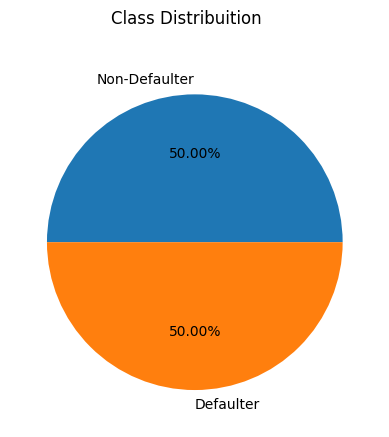

In [ ]:
plot_pie(pd.DataFrame(y_rus),'Default',['Non-Defaulter','Defaulter'],'Class Distribuition')

# Training Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
def get_accuracy_score(model_name,y_test, y_predicted):
  accuracy = accuracy_score(y_test, y_predicted)
  print(f"{model_name} Model Accuracy: {round(accuracy*100,2)} %")
  return round(accuracy*100,2)

def generate_confusion_matrix(model_name,y_test, y_predicted):
  cmatrix = confusion_matrix(y_test, y_predicted)
  sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Greens', xticklabels=dataset['Default'].sort_values().unique(), yticklabels=dataset['Default'].sort_values().unique())
  plt.title(f"{model_name} Confusion Matrix")
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

def generate_classification_report(y_test, y_predicted):
  report = classification_report(y_test, y_predicted, output_dict=True)
  report_df = pd.DataFrame(report).transpose()
  return report_df

In [ ]:
X_rus

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_Bachelor's,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
191649,58,108264,61367,453,72,3,23.96,60,0.32,0,...,1,1,0,0,1,0,0,0,1,0
243439,42,71611,31938,663,91,2,22.20,60,0.30,0,...,0,1,0,0,0,0,0,1,0,1
175764,31,30753,216354,740,38,2,22.94,12,0.18,0,...,0,0,1,1,0,0,0,0,1,0
185368,40,130612,53234,539,18,3,12.83,60,0.65,0,...,1,1,0,0,0,1,0,0,1,0
68741,68,70154,243294,603,57,2,14.71,24,0.50,0,...,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255310,65,111206,112192,315,3,3,20.17,36,0.63,0,...,1,0,1,1,0,0,0,0,1,0
255324,50,34641,108855,347,17,4,11.77,24,0.47,0,...,1,1,0,0,1,0,0,0,1,0
255333,22,45575,43355,545,99,1,21.86,12,0.52,0,...,1,0,1,0,0,1,0,0,1,0
255341,40,129890,116119,701,38,3,9.91,24,0.23,0,...,1,1,0,0,0,0,1,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_rus_scaled = scaler.fit_transform(X_rus)
X_rus_scaled_df = pd.DataFrame(X_rus_scaled, columns=X_rus.columns)

In [ ]:
from sklearn.decomposition import PCA

X_pca = PCA(n_components=12).fit_transform(X_rus_scaled_df)
x_pca_df = pd.DataFrame(X_pca)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_pca_df, y_rus, test_size=0.2, random_state=42,stratify=y_rus)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

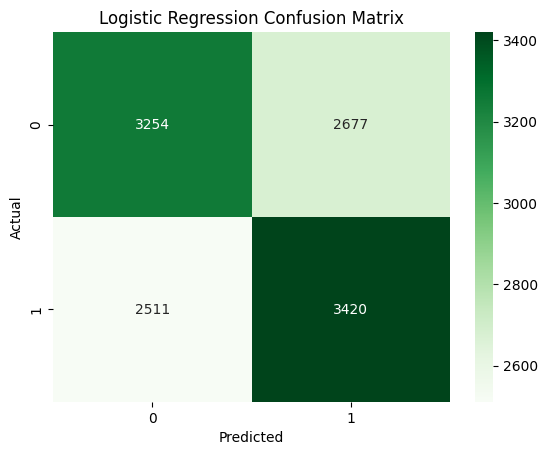

In [ ]:
generate_confusion_matrix('Logistic Regression',y_test, y_predicted)

In [ ]:
get_accuracy_score('Logistic Regression',y_test, y_predicted)

Logistic Regression Model Accuracy: 56.26 %


56.26

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_predicted = dtree.predict(X_test)

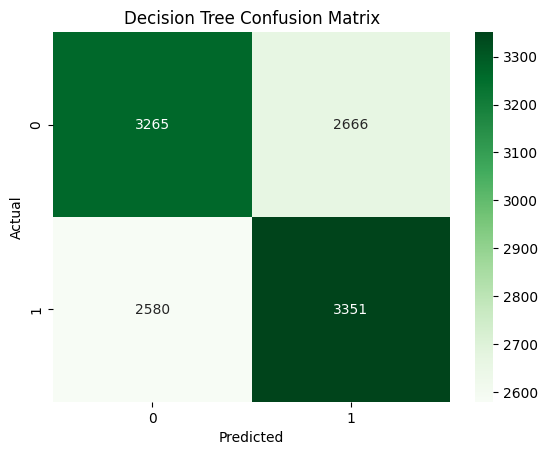

In [ ]:
generate_confusion_matrix('Decision Tree',y_test, y_predicted)

In [ ]:
get_accuracy_score('Decision Tree',y_test, y_predicted)

Decision Tree Model Accuracy: 55.77 %


55.77

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_predicted = rf.predict(X_test)

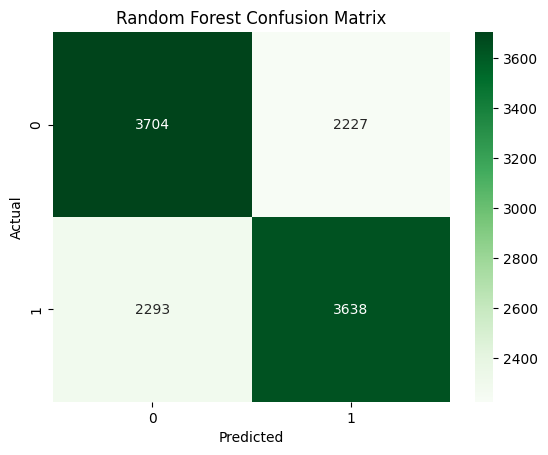

In [ ]:
generate_confusion_matrix('Random Forest',y_test, y_predicted)

In [ ]:
get_accuracy_score('Random Forest',y_test, y_predicted)

Random Forest Model Accuracy: 61.9 %


61.9

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)

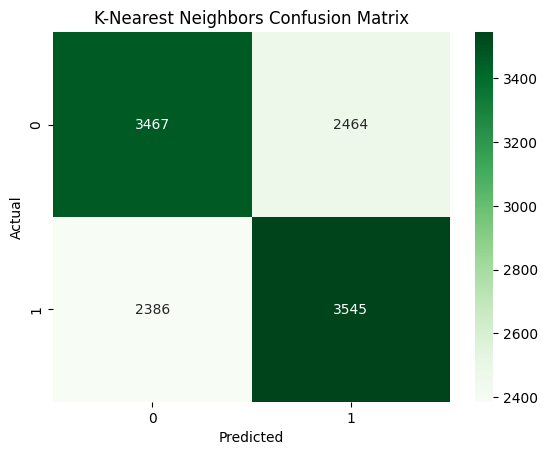

In [ ]:
generate_confusion_matrix('K-Nearest Neighbors',y_test, y_predicted)

In [ ]:
get_accuracy_score('K-Nearest Neighbors',y_test, y_predicted)

K-Nearest Neighbors Model Accuracy: 59.11 %


59.11

In [ ]:
import xgboost as xgb

In [ ]:
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)
y_predicted = xgboost.predict(X_test)

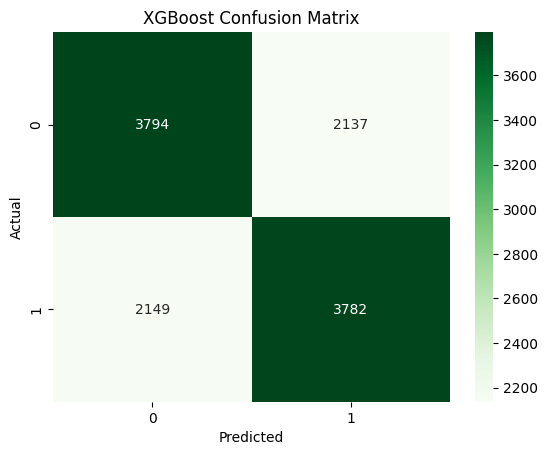

In [ ]:
generate_confusion_matrix('XGBoost',y_test, y_predicted)

In [ ]:
get_accuracy_score('XGBoost',y_test, y_predicted)

XGBoost Model Accuracy: 63.87 %


63.87